In [1]:
import pandas as pd

In [2]:
# load data
portfolio_df = pd.read_pickle('../calculation_result_portfolio.pkl')
stock_df = pd.read_pickle('../stock_result.pkl')
benchmark_df = pd.read_pickle('../dummy_weight_df.pkl')
benchmark_portofolio_df = pd.read_pickle('../benchmark_portfolio.pkl')

In [16]:
stock_df.shape

(1458, 20)

In [17]:
portfolio_df.shape

(243, 23)

In [18]:
benchmark_portofolio_df.head()

date  weight display_name actual_data       ticker  open  close  \
0   2021-01-01   0.088         神州高铁  2020-12-31  000008.XSHE   NaN    NaN   
359 2021-01-01   0.491         星宇股份  2020-12-31  601799.XSHG   NaN    NaN   
360 2021-01-01   0.118         捷成股份  2020-12-31  300182.XSHE   NaN    NaN   
374 2021-01-01   0.192          木林森  2020-12-31  002745.XSHE   NaN    NaN   
249 2021-01-01   0.710         国轩高科  2020-12-31  002074.XSHE   NaN    NaN   

     high  low  volume  money  norm_weight  pct_change  ptc  pct  
0     NaN  NaN     NaN    NaN      0.00088         NaN  NaN  NaN  
359   NaN  NaN     NaN    NaN      0.00491         NaN  NaN  NaN  
360   NaN  NaN     NaN    NaN      0.00118         NaN  NaN  NaN  
374   NaN  NaN     NaN    NaN      0.00192         NaN  NaN  NaN  
249   NaN  NaN     NaN    NaN      0.00710         NaN  NaN  NaN

In [3]:
selected_columns = ['date', 'ticker', 'pct', 'weight_portfolio']
merged_df = pd.merge(stock_df[selected_columns], benchmark_portofolio_df, how='right', on=['date', 'ticker'], suffixes=('_portfolio', '_benchmark'))

In [4]:
merged_df.loc[merged_df['date']=='2021-01-01']

date       ticker  pct_portfolio  weight_portfolio  weight  \
0   2021-01-01  000008.XSHE            NaN               NaN   0.088   
1   2021-01-01  601799.XSHG            NaN               NaN   0.491   
2   2021-01-01  300182.XSHE            NaN               NaN   0.118   
3   2021-01-01  002745.XSHE            NaN               NaN   0.192   
4   2021-01-01  002074.XSHE            NaN               NaN   0.710   
..         ...          ...            ...               ...     ...   
495 2021-01-01  688002.XSHG            NaN               NaN   0.438   
496 2021-01-01  688099.XSHG            NaN               NaN   0.287   
497 2021-01-01  688088.XSHG            NaN               NaN   0.252   
498 2021-01-01  002957.XSHE            NaN               NaN   0.030   
499 2021-01-01  601615.XSHG            NaN               NaN   0.252   

    display_name actual_data  open  close  high  low  volume  money  \
0           神州高铁  2020-12-31   NaN    NaN   NaN  NaN     NaN    NaN   
1           星宇股份  2020-12-31   NaN    NaN   NaN  NaN     NaN    NaN   
2           捷成股份  2020-12-31   NaN    NaN   NaN  NaN     NaN    NaN   
3            木林森  2020-12-31   NaN    NaN   NaN  NaN     NaN    NaN   
4           国轩高科  2020-12-31   NaN    NaN   NaN  NaN     NaN    NaN   
..           ...         ...   ...    ...   ...  ...     ...    ...   
495         睿创微纳  2020-12-31   NaN    NaN   NaN  NaN     NaN    NaN   
496         晶晨股份  2020-12-31   NaN    NaN   NaN  NaN     NaN    NaN   
497         虹软科技  2020-12-31   NaN    NaN   NaN  NaN     NaN    NaN   
498         科瑞技术  2020-12-31   NaN    NaN   NaN  NaN     NaN    NaN   
499         明阳智能  2020-12-31   NaN    NaN   NaN  NaN     NaN    NaN   

     norm_weight  pct_change  ptc  pct_benchmark  
0        0.00088         NaN  NaN            NaN  
1        0.00491         NaN  NaN            NaN  
2        0.00118         NaN  NaN            NaN  
3        0.00192         NaN  NaN            NaN  
4        0.00710         NaN  NaN            NaN  
..           ...         ...  ...            ...  
495      0.00438         NaN  NaN            NaN  
496      0.00287         NaN  NaN            NaN  
497      0.00252         NaN  NaN            NaN  
498      0.00030         NaN  NaN            NaN  
499      0.00252         NaN  NaN            NaN  

[500 rows x 17 columns]

In [5]:
merged_df['allocation'] = (merged_df['weight_portfolio'] - merged_df['norm_weight']) * merged_df['pct_benchmark']

In [6]:
# new df where drop allocation is Nan
new_df = merged_df.dropna(subset=['allocation'])
new_df.head()

date       ticker  pct_portfolio  weight_portfolio  weight  \
2148 2021-01-05  600409.XSHG       0.045902          0.028341   0.225   
2150 2021-01-05  600415.XSHG       0.099251          0.017384   0.266   
2390 2021-01-05  002709.XSHE       0.031973          0.100364   0.603   
2401 2021-01-05  300274.XSHE      -0.017478          0.226404   1.307   
2458 2021-01-05  002920.XSHE       0.032667          0.258388   0.246   

     display_name actual_data   open  close   high    low       volume  \
2148         三友化工  2020-12-31   9.23   9.57   9.66   9.08   82669289.0   
2150         小商品城  2020-12-31   5.33   5.87   5.87   5.22  180936477.0   
2390         天赐材料  2020-12-31  32.54  33.89  34.22  31.39   59152352.0   
2401         阳光电源  2020-12-31  76.03  76.45  80.20  75.27   51384827.0   
2458         德赛西威  2020-12-31  85.44  87.25  87.95  84.07    3852674.0   

             money  norm_weight  pct_change       ptc  pct_benchmark  \
2148  7.803391e+08     0.002250    0.045902  0.045902       0.045902   
2150  1.010225e+09     0.002660    0.099251  0.099251       0.099251   
2390  1.942406e+09     0.006030    0.031973  0.031973       0.031973   
2401  3.961995e+09     0.013069   -0.017478 -0.017478      -0.017478   
2458  3.322598e+08     0.002460    0.032667  0.032667       0.032667   

      allocation  
2148    0.001198  
2150    0.001461  
2390    0.003016  
2401   -0.003729  
2458    0.008360

In [28]:
def calculate_allocation(data: pd.DataFrame):
    '''
    calculate portfolio allocation
    Ai = (wi - Wi) / Bi
    Ai: individual asset allocation effective
    wi: individual asset weight
    Wi: benchmark weight
    Bi: benchmark return
    @param data: dataframe with columns ['date', 'ticker', 'display_name', 'pct_benchmark', 'norm_weight']
    '''
    data['allocation'] = (data['weight_portfolio'] - data['norm_weight']) * data['pct_benchmark']

In [35]:
def calculate_selection(data: pd.DataFrame):
    '''
    calculate portfolio selection
    Si = Wi * (Ri - Bi)
    Si: individual asset selection effective
    Wi: benchmark weight
    Ri: individual asset return
    Bi: benchmark return
    @param data: dataframe with columns ['date', 'ticker', 'display_name', 'pct_benchmark', 'norm_weight']
    '''
    data['selection'] = data['norm_weight'] * (data['pct_portfolio'] - data['pct_benchmark'])

In [55]:
def calculate_interaction(data: pd.DataFrame):
    '''
    calculate portfolio interaction
    Ii = (wi - Wi) * (Ri - Bi)
    Ii: individual asset interaction effective
    wi: individual asset weight
    Wi: benchmark weight
    Ri: individual asset return
    Bi: benchmark return
    @param data: dataframe with columns ['date', 'ticker', 'display_name', 'pct_benchmark', 'norm_weight']
    '''
    data['interaction'] = (data['weight_portfolio'] - data['norm_weight']) * (data['pct_portfolio'] - data['pct_benchmark'])

In [56]:
def run(portfolio: pd.DataFrame, benchmark: pd.DataFrame):
    '''
    return dataframe with allocation and selection result  
    '''
    selected_portfolio_columns = ['date', 'ticker', 'pct', 'weight_portfolio']
    selected_benchmark_columns = ['date', 'ticker','pct','norm_weight','display_name']
    merged_df = pd.merge(portfolio[selected_portfolio_columns], benchmark[selected_benchmark_columns], how='right', on=['date', 'ticker'], suffixes=('_portfolio', '_benchmark'))
    calculate_allocation(merged_df)
    calculate_selection(merged_df)
    calculate_interaction(merged_df)
    return merged_df

result = run(stock_df, benchmark_portofolio_df)



In [57]:
result.head()

date       ticker  pct_portfolio  weight_portfolio  pct_benchmark  \
0 2021-01-01  000008.XSHE            NaN               NaN            NaN   
1 2021-01-01  601799.XSHG            NaN               NaN            NaN   
2 2021-01-01  300182.XSHE            NaN               NaN            NaN   
3 2021-01-01  002745.XSHE            NaN               NaN            NaN   
4 2021-01-01  002074.XSHE            NaN               NaN            NaN   

   norm_weight display_name  allocation  selection  interaction  
0      0.00088         神州高铁         NaN        NaN          NaN  
1      0.00491         星宇股份         NaN        NaN          NaN  
2      0.00118         捷成股份         NaN        NaN          NaN  
3      0.00192          木林森         NaN        NaN          NaN  
4      0.00710         国轩高科         NaN        NaN          NaN

In [48]:
pct_difference = result['pct_portfolio'] - result['pct_benchmark']
# count number of null and not null
pct_difference.isnull().sum(), pct_difference.notnull().sum()
# show row that is not null
pct_difference[pct_difference.notnull()]

2148      0.0
2150      0.0
2390      0.0
2401      0.0
2458      0.0
         ... 
181634    0.0
181636    0.0
181900    0.0
182136    0.0
182137    0.0
Length: 1073, dtype: float64

<Axes: xlabel='date'>

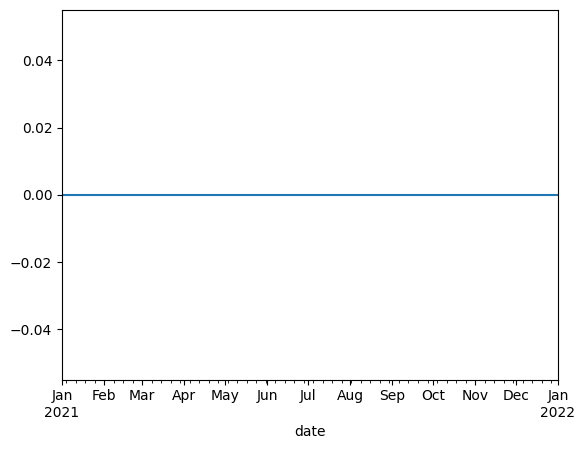

In [59]:
result.groupby('date')['selection'].sum().plot()

<Axes: xlabel='date'>

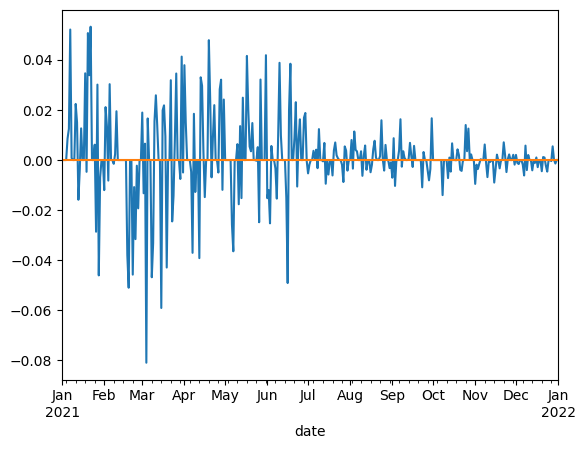

In [49]:
# drop result with empty allocation
# result = result.dropna(subset=['allocation'])
result.groupby('date')['allocation'].sum().plot()
result.groupby('date')['selection'].sum().plot()

In [54]:
result.groupby('date')['allocation'].sum().tail(10)


date
2021-12-23   -0.002253
2021-12-24   -0.004619
2021-12-25    0.000000
2021-12-26    0.000000
2021-12-27   -0.000399
2021-12-28    0.005463
2021-12-29    0.000114
2021-12-30   -0.001395
2021-12-31    0.000068
2022-01-01    0.000000
Name: allocation, dtype: float64